<a href="https://colab.research.google.com/github/fatach/Python/blob/master/Recommander_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
df =pd.read_csv('ratings.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807


In [7]:
movies =pd.read_csv('movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
df = pd.merge(df, movies)
df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [11]:
df =df.drop(columns='genres',axis=1)
df.head(2)

,userId,movieId,rating,timestamp,title
0,1,16,4.0,1217897793,Casino (1995)
1,9,16,4.0,842686699,Casino (1995)


In [12]:
df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [13]:
df.shape

(105339, 5)

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [15]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


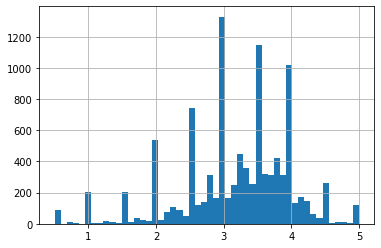

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

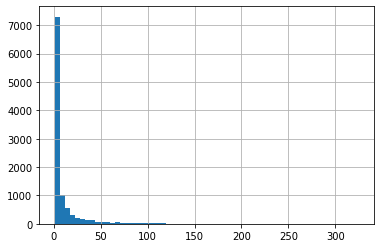

In [17]:
ratings['number_of_ratings'].hist(bins=60)

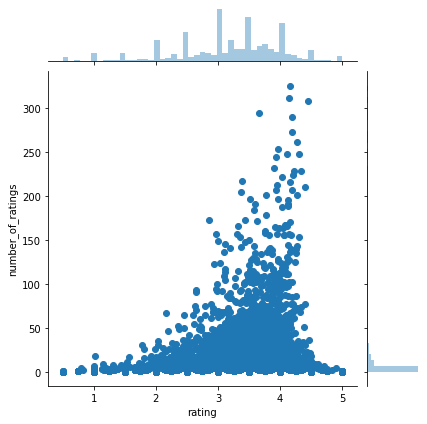

In [18]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [19]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),10 to Midnight (1983),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),13 (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Rue Madeleine (1947),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),...,Yves Saint Laurent (2014),Z (1969),Zabriskie Point (1970),Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zandalee (1991),Zapped! (1982),Zardoz (1974),Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zebraman (2004),Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zodiac (2007),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),Zookeeper (2011),Zoolander (2001),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [0]:
AFO_user_rating = movie_matrix['Pulp Fiction (1994)']
contact_user_rating = movie_matrix['Braveheart (1995)']

In [25]:
AFO_user_rating.head()

userId
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [26]:
contact_user_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    0.5
Name: Braveheart (1995), dtype: float64

In [28]:
similar=movie_matrix.corrwith(AFO_user_rating)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
similar.head()

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                  1.000000
'burbs, The (1989)                        -0.475997
dtype: float64

In [30]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
similar_to_contact.head()

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                       NaN
'burbs, The (1989)                         0.660184
dtype: float64

In [32]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.475997
(500) Days of Summer (2009),0.076894
*batteries not included (1987),0.881917
...And Justice for All (1979),0.961524


In [0]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])

In [34]:
corr_AFO .head()

,correlation,number_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.475997,20
(500) Days of Summer (2009),0.076894,37
*batteries not included (1987),0.881917,11
...And Justice for All (1979),0.961524,10


In [35]:
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.660184,20
(500) Days of Summer (2009),-0.012659,37
*batteries not included (1987),0.058282,11
...And Justice for All (1979),-0.308957,10
10 (1979),1.000000,3


In [36]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Reservoir Dogs (1992),0.472520,131
Kill Bill: Vol. 1 (2003),0.442408,110
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),0.406999,125
Natural Born Killers (1994),0.406697,111
There's Something About Mary (1998),0.406349,112
"Clockwork Orange, A (1971)",0.405094,134
Goodfellas (1990),0.386565,135


In [37]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Braveheart (1995),1.000000,248
Jerry Maguire (1996),0.471669,124
"Green Mile, The (1999)",0.440321,101
American History X (1998),0.439146,103
In the Line of Fire (1993),0.430056,105
Mrs. Doubtfire (1993),0.424130,166
"Fugitive, The (1993)",0.418182,244
"Rock, The (1996)",0.413696,160
Beetlejuice (1988),0.380832,107
